<a href="https://colab.research.google.com/github/KavilaViswanathan/YouTube_Video_Summarization_with_Hugging_Face_ASR/blob/main/YouTube_Video_Summarization_with_Hugging_Face_ASR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download YouTube Video's Audio

In [ ]:
! pip install pytube -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.9 MB/s eta 0:00:00


In [ ]:
!pip install -q youtube_transcript_api

In [ ]:
!pip install requests beautifulsoup4

In [ ]:
from pytube import YouTube
from youtube_transcript_api import YouTubeTranscriptApi

In [ ]:

from pytube import YouTube

import requests
from bs4 import BeautifulSoup
VIDEO_URL = 'https://www.youtube.com/watch?v=UFDOY1wOOz0'
#VIDEO_URL = 'https://www.youtube.com/watch?v=SqC215HEKwc' #batman
# Define the YouTube video URL
#  VIDEO_URL = 'https://www.youtube.com/watch?v=h-JVjs9AAmQ'  # Replace with the video URL you want to analyze
yt = YouTube(VIDEO_URL)
# Get the video title
video_title = yt.title
# Get the video's duration
video_duration = yt.length  # Duration in seconds
thumbnail_image_url = yt.thumbnail_url

# Send an HTTP GET request to the video URL
response = requests.get(VIDEO_URL)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract video description
    video_description = soup.find('meta', itemprop="description")['content']

    print(f"Description: {video_description}")
else:
    print("Failed to fetch the video data. Check the URL or your internet connection.")

# Get the video's description
# video_description = yt.description

# Print the duration and description
print(f"Video Duration: {video_duration} seconds")
# print(f"Video Description:\n{video_description}")


Description: 🔥 Edureka PGP in AI & ML: https://www.edureka.co/post-graduate/machine-learning-and-aiThis Edureka video gives you a brief overview of AI and how it has bee...
Video Duration: 139 seconds


In [ ]:
video_id = VIDEO_URL.split("=")[1]
video_id

'UFDOY1wOOz0'

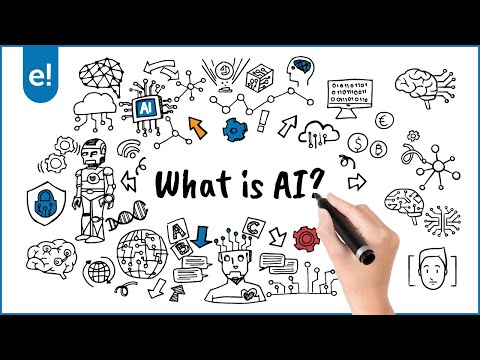

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [ ]:
YouTubeTranscriptApi.get_transcript(video_id)
transcript = YouTubeTranscriptApi.get_transcript(video_id)

In [ ]:
transcript[0:5]

[{'text': "What is artificial intelligence? Before\nwe answer that let's look at these terms",
  'start': 0.0,
  'duration': 5.49},
 {'text': 'individually what do you understand by\nthe term artificial well it can be',
  'start': 5.49,
  'duration': 4.529},
 {'text': 'anything that is made by humans things\nthat are not natural and what do you',
  'start': 10.019,
  'duration': 5.011},
 {'text': 'understand by intelligence it is the\nability to understand think and learn so',
  'start': 15.03,
  'duration': 5.79},
 {'text': 'what do we get when we combine these two\ntogether',
  'start': 20.82,
  'duration': 2.52}]

In [ ]:
#VIDEO_URL = 'https://youtu.be/qNJRGHk7sN8'

In [ ]:
result = ""
for i in transcript:
    result += ' ' + i['text']
#print(result)
print(len(result))

2033


In [ ]:
from IPython.display import YouTubeVideo

# Create an HTML template to display the transcript
html_template = """
<!DOCTYPE html>
<html>
<head>
    <title>YouTube Video Transcript</title>
</head>
<body>
    <h1>YouTube Video Transcript</h1>
    <ul>
"""

# Loop through the transcript data and add each caption
for caption in transcript:
    html_template += f"        <li>{caption['text']}</li>\n"

# Close the HTML template
html_template += """
    </ul>
</body>
</html>
"""

# Define the file path within the Colab environment
file_path = '/content/video_transcript.html'

# Open the file for writing and save the transcript in HTML format
with open(file_path, 'w') as file:
    file.write(html_template)

# Optionally, you can print a message to confirm the file has been saved
print(f'Video transcript has been saved to {file_path}')


Video transcript has been saved to /content/video_transcript.html


In [ ]:
yt = YouTube(VIDEO_URL)

In [ ]:
yt.streams \
  .filter(only_audio = True, file_extension = 'mp4') \
  .first() \
  .download(filename = 'ytaudio.mp4')

'/content/ytaudio.mp4'

In [ ]:
! ffmpeg -i ytaudio.mp4 -acodec pcm_s16le -ar 16000 ytaudio.wav

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

# English ASR with HuggingSound

In [ ]:
!pip install huggingsound -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.3/214.3 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 106.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 98.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 104.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 115.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 36.1 MB/s eta 0:00:00
ERROR: pip's dependency

In [ ]:
from huggingsound import SpeechRecognitionModel


In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
device

'cuda'

In [ ]:
model = SpeechRecognitionModel("jonatasgrosman/wav2vec2-large-xlsr-53-english", device = device)


INFO:huggingsound.speech_recognition.model:Loading model...


OUT OF MEMORY (OOM) error

# Audio Chunking

In [ ]:
import librosa

In [ ]:
input_file = '/content/ytaudio.wav'

In [ ]:
print(librosa.get_samplerate(input_file))

# Stream over 30 seconds chunks rather than load the full file
stream = librosa.stream(
    input_file,
    block_length=30,
    frame_length=16000,
    hop_length=16000
)

16000


In [ ]:
import soundfile as sf


In [ ]:
for i,speech in enumerate(stream):
  sf.write(f'{i}.wav', speech, 16000)

In [ ]:
i

4

# Audio Transcription / ASR / Speech to Text

In [ ]:
audio_path =[]
for a in range(i+1):
  audio_path.append(f'/content/{a}.wav')

In [ ]:
audio_path

['/content/0.wav',
 '/content/1.wav',
 '/content/2.wav',
 '/content/3.wav',
 '/content/4.wav']

In [ ]:
transcriptions = model.transcribe(audio_path)

100%|██████████| 5/5 [00:04<00:00,  1.11it/s]


In [ ]:
full_transcript = ' '

In [ ]:
for item in transcriptions:
  full_transcript += ''.join(item['transcription'])

In [ ]:
len(full_transcript)

1969

In [ ]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html
ERROR: Could not find a version that satisfies the requirement torch==1.8.1+cu111 (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1, 2.1.0)
ERROR: No matching distribution found for torch==1.8.1+cu111


In [ ]:
from transformers import pipeline

translation_pipeline_german = pipeline('translation_en_to_de')
translation_pipeline_french = pipeline('translation_en_to_fr')

No model was supplied, defaulted to t5-base and revision 686f1db (https://huggingface.co/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5_fast.py:158: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(
No model was supplied, defaulted to t5-base and revision 686f1db (https://huggingface.co/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


# Text Summarization

In [ ]:
from transformers import pipeline

In [ ]:
summarization = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
summarized_text = summarization(full_transcript)

In [ ]:
summarized_text[0]['summary_text']

' Artificial Intelligence is a broad area of computer science that makes machine seem liketey have human intelligence . The goal of ai is to mimic the human brain and create systems that can function intelligently and independently . i can manifest itself in many different ways if you have ever asked elexa to audor your food or browse netflix movie suggestions you are actually interacting with ai without realising it .'

In [ ]:
# Extract 'summary_text' values if necessary
# Assuming 'summarized_text' is a list of dictionaries
summary_text_list = [item['summary_text'] for item in summarized_text]

# Concatenate the elements of the list into a single string with line breaks
summary_text = "\n".join(summary_text_list)

# Define the file path within the Colab environment
file_path = '/content/summary.txt'

# Open the file for writing and save the summary text
with open(file_path, 'w') as file:
    file.write(summary_text)

# Optionally, you can print a message to confirm the file has been saved
print(f'Summary text has been saved to {file_path}')


Summary text has been saved to /content/summary.txt


CONVERT TO HTML

In [ ]:
with open('summary.txt', 'r') as file:
    file_content = file.read()


In [ ]:
results_german = translation_pipeline_german(file_content)

translated_text_german = results_german[0]['translation_text']
results_french = translation_pipeline_french(file_content)

translated_text_french = results_french[0]['translation_text']

In [ ]:
from pytube import YouTube


# Define the URL of the background image and the thumbnail image
background_image_url = 'https://i.pinimg.com/736x/5d/1f/29/5d1f29f9da9d3111d13dd283b8f1d450.jpg'
thumbnail_image_url = yt.thumbnail_url

# HTML template with extended CSS styling, background image, and thumbnail image
html_template = f"""
<!DOCTYPE html>
<html>
<head>
    <title>{video_title}</title>
    <style>
        body {{
            font-family: Arial, sans-serif;
            background: url('{background_image_url}') center/cover no-repeat;
            margin: 0;
            background-size: cover;
            padding: 0;
            display: flex;
            justify-content: center;
            align-items: center;
            height: 150vh;
        }}
        .container {{
            background-color: rgba(255, 255, 255, 0.8); /* Background color with transparency */
            padding: 20px;
            border: 1px solid #ccc;
            border-radius: 5px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
            max-width: 800px; /* Adjust the maximum width as needed */
            margin: 20px; /* Add margin to the container */
        }}
        h1 {{
            color: #333; /* Title text color */
            background-color: #f0f0f0; /* Title background color */
            padding: 10px; /* Add padding to the title */
            border-radius: 5px; /* Rounded corners for the title */
        }}
        pre {{
            font-size: 16px;
            line-height: 1.5;
            white-space: pre-wrap;
            margin: 10px 0; /* Add margin to the content */
        }}
        p {{
            color: #666; /* Text color for duration and description */
            background-color: #f7f7f7; /* Background color for paragraphs */
            padding: 5px; /* Add padding to paragraphs */
            border-radius: 5px; /* Rounded corners for paragraphs */
        }}
        .thumbnail {{
            max-width: 100%;
        }}
    </style>
</head>
<body>
    <div class="container">
        <h1>{video_title}</h1>
        <img class="thumbnail" src="{thumbnail_image_url}" alt="Video Thumbnail">
        <pre>{file_content}</pre>
        <p><strong>Video Duration:</strong> {video_duration} seconds</p>
        <p><strong>Video Description:</strong></p>
        <p>{video_description}</p>
        <p><strong>Translated French:</strong></p>
        <p>{translated_text_french}</p>
        <p><strong>Translated German:</strong></p>
        <p>{translated_text_german}</p>
    </div>
</body>
</html>
"""

# Save the HTML content to an HTML file
with open("styled_file_content.html", "w") as html_file:
    html_file.write(html_template)


In [ ]:
from IPython.display import HTML

HTML(html_template)


In [ ]:
# Define the file path for the new HTML file
html_file_path = '/content/output.html'

# HTML content you want to save to the file
html_content = html_template

# Save the HTML content to the file
with open(html_file_path, 'w') as html_file:
    html_file.write(html_content)


In [ ]:
import webbrowser

# Open the HTML file in a new browser tab or window
webbrowser.open('file://' + html_file_path, new=2)


False